In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
df_1 = pd.read_csv('J:/MKS_homework/rebills_2018-01-01_2018-01-31/rebills_2018-01-01_2018-01-31.csv', sep=';', encoding = 'windows-1251')   

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135143 entries, 0 to 1135142
Data columns (total 11 columns):
uuid            1135143 non-null object
sub_uuid        1135143 non-null object
Лэндинг         1135143 non-null int64
URL             1135143 non-null object
Подключение     1135143 non-null object
Юр.лицо         1135143 non-null object
ОСС             1135143 non-null object
msisdn          1135143 non-null int64
Дата ребилла    1135143 non-null object
Код ошибки      1135143 non-null int64
Статус          1135143 non-null int64
dtypes: int64(4), object(7)
memory usage: 95.3+ MB


In [4]:
df_1.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус
0,d1030000-d496-48d1-a3f5-05636924ed67,43c1ab76-617c-45f2-b0d6-4fc2336f05ca,933,Амедиатека,mks (478),МКС ООО,МТС,79112146342,2018-01-30 16:47:37,0,1
1,ea040000-d95e-4ded-aa31-9757c77b87dc,9b93bd74-faab-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79814696460,2018-01-22 13:56:34,0,1
2,36230000-3c3e-4a9d-99a6-c44654c6f7e7,63241734-01ce-11e8-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79803438608,2018-01-25 15:52:14,0,1
3,072b0000-8a74-4fe2-8373-636db16b621c,713ac9a4-b9c6-48cf-8e3a-384d99171333,933,Амедиатека,mks (478),МКС ООО,МТС,79198598960,2018-01-23 17:08:20,0,1
4,d23d0000-4814-455b-96aa-55eddeba8784,c31983d0-e73c-4081-8430-e6e444982b0f,933,Амедиатека,mks (478),МКС ООО,МТС,79145218681,2018-01-18 13:51:42,0,1


In [ ]:
Задача 1.
 Разметить данные по стандарту, который не известен человеку, который убил мне 4 дня праздников и вынес мозг на работе.
 Поня_Хаоса (я) не пошла на свидание с анимащницей и не посмотрела 14 серий разных мультов, вместо этого она кодила код.
 А ещё похоже в понедельник мне предложат бесплатно стать техническим руководиелем нашего админа нашей БД, фу такими быть.

Подзадача 1.
Ебёмся и вручную размечаем данные по пользователям по оператором сотовой связи, 75 гигов чистых данных и полгода работы...
- а откуда пришёл пользователь, должен разметить я, я а не боги эксель и скуля. Ну. ок. Мне за это платят, терпим и работаем.    

In [5]:
df_1['user_code'] = df_1['msisdn'].astype(str)
df_1['user_code'] = df_1['user_code'].map(lambda x: str(x)[:-7])

In [6]:
df_1.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code
0,d1030000-d496-48d1-a3f5-05636924ed67,43c1ab76-617c-45f2-b0d6-4fc2336f05ca,933,Амедиатека,mks (478),МКС ООО,МТС,79112146342,2018-01-30 16:47:37,0,1,7911
1,ea040000-d95e-4ded-aa31-9757c77b87dc,9b93bd74-faab-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79814696460,2018-01-22 13:56:34,0,1,7981
2,36230000-3c3e-4a9d-99a6-c44654c6f7e7,63241734-01ce-11e8-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79803438608,2018-01-25 15:52:14,0,1,7980
3,072b0000-8a74-4fe2-8373-636db16b621c,713ac9a4-b9c6-48cf-8e3a-384d99171333,933,Амедиатека,mks (478),МКС ООО,МТС,79198598960,2018-01-23 17:08:20,0,1,7919
4,d23d0000-4814-455b-96aa-55eddeba8784,c31983d0-e73c-4081-8430-e6e444982b0f,933,Амедиатека,mks (478),МКС ООО,МТС,79145218681,2018-01-18 13:51:42,0,1,7914


In [7]:
df_1['user_count'] = df_1['user_code'].astype(bool)
df_1['user_count'] = df_1['user_count'].astype('int64')

In [8]:
df_1.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code,user_count
0,d1030000-d496-48d1-a3f5-05636924ed67,43c1ab76-617c-45f2-b0d6-4fc2336f05ca,933,Амедиатека,mks (478),МКС ООО,МТС,79112146342,2018-01-30 16:47:37,0,1,7911,1
1,ea040000-d95e-4ded-aa31-9757c77b87dc,9b93bd74-faab-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79814696460,2018-01-22 13:56:34,0,1,7981,1
2,36230000-3c3e-4a9d-99a6-c44654c6f7e7,63241734-01ce-11e8-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79803438608,2018-01-25 15:52:14,0,1,7980,1
3,072b0000-8a74-4fe2-8373-636db16b621c,713ac9a4-b9c6-48cf-8e3a-384d99171333,933,Амедиатека,mks (478),МКС ООО,МТС,79198598960,2018-01-23 17:08:20,0,1,7919,1
4,d23d0000-4814-455b-96aa-55eddeba8784,c31983d0-e73c-4081-8430-e6e444982b0f,933,Амедиатека,mks (478),МКС ООО,МТС,79145218681,2018-01-18 13:51:42,0,1,7914,1


In [9]:
df_1['rebill_count'] = df_1['Дата ребилла'].astype(bool)
df_1['rebill_count'] = df_1['rebill_count'].astype('int64')

In [10]:
df_1.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code,user_count,rebill_count
0,d1030000-d496-48d1-a3f5-05636924ed67,43c1ab76-617c-45f2-b0d6-4fc2336f05ca,933,Амедиатека,mks (478),МКС ООО,МТС,79112146342,2018-01-30 16:47:37,0,1,7911,1,1
1,ea040000-d95e-4ded-aa31-9757c77b87dc,9b93bd74-faab-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79814696460,2018-01-22 13:56:34,0,1,7981,1,1
2,36230000-3c3e-4a9d-99a6-c44654c6f7e7,63241734-01ce-11e8-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79803438608,2018-01-25 15:52:14,0,1,7980,1,1
3,072b0000-8a74-4fe2-8373-636db16b621c,713ac9a4-b9c6-48cf-8e3a-384d99171333,933,Амедиатека,mks (478),МКС ООО,МТС,79198598960,2018-01-23 17:08:20,0,1,7919,1,1
4,d23d0000-4814-455b-96aa-55eddeba8784,c31983d0-e73c-4081-8430-e6e444982b0f,933,Амедиатека,mks (478),МКС ООО,МТС,79145218681,2018-01-18 13:51:42,0,1,7914,1,1


In [ ]:
Подзадача 2.
Проверить индикатор [Статус] на влияние со стороны возмущений в варпе и возможные козни лоялистов.

In [11]:
df_1['Код ошибки'].value_counts()

0       1037110
102       63740
52        24634
51         6868
356        2452
8           311
50           22
1001          2
103           2
101           1
53            1
Name: Код ошибки, dtype: int64

In [12]:
df_1['Статус'].value_counts()

1    1037110
0      98033
Name: Статус, dtype: int64

In [14]:
user_types_1 = df_1['user_code'].drop_duplicates().values.tolist()
user_types_1.sort()
print(user_types_1)

['7900', '7901', '7902', '7903', '7904', '7905', '7906', '7908', '7909', '7910', '7911', '7912', '7913', '7914', '7915', '7916', '7917', '7918', '7919', '7920', '7921', '7922', '7923', '7924', '7925', '7926', '7927', '7928', '7929', '7930', '7931', '7932', '7933', '7937', '7938', '7939', '7950', '7951', '7952', '7953', '7958', '7960', '7961', '7962', '7963', '7964', '7965', '7966', '7967', '7968', '7969', '7977', '7978', '7980', '7981', '7982', '7983', '7984', '7985', '7986', '7987', '7988', '7989', '7991', '7992', '7996', '7999']


In [15]:
user_operator_1 = {'7900': "TELE2", '7901': "TELE2", '7903':'BEE','7904':"TELE2",'7905':"BEE", '7906': 'BEE','7980':'TELE2',
           '709':"BEE",'7910':'МТС', '7911':'МТС','7912':'МТС', '7913': "МТС", '7914':'МТС','7915':'МТС','7916':'МТС',
           '7917':"МТС",'7918':'МТС','7919':'МТС','7920':'MEG','7921':'MEG','7922':'MEG','7923':'MEG','7924':'MEG',
           '7925':'MEG','7926':'MEG','7927':'MEG','7928':'MEG','7929':'MEG','7930':'MEG','7931':'MEG','7932':'MEG',
           '7933':'MEG','7938':'MEG','7939':'MEG_SMART','7950':'TELE2','7951':'TELE2','7952':'TELE2','7953':'TELE2',
           '7958':'MIX_TELECOM','7960':'BEE','7961':'BEE','7962':'BEE','7963':'BEE',"7964":'BEE','7965':'BEE',
           '7966':'BEE','7967':'BEE','7968':'BEE','7969':'BEE','7977':'TELE2','7978':'МТС-WIN','7980':'МТС',
           '7981':'МТС','7982':'МТС','7983':'МТС','7984':'МТС','7985':'МТС','7986':'МТС','7987':'МТС',
           '7988':'МТС','7989':'МТС','7996':'YOTA_TELE2','7999':'YOTA_MEG'}

In [16]:
df_1['user_operator'] = df_1['user_code'].map(user_operator_1)
df_1.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code,user_count,rebill_count,user_operator
0,d1030000-d496-48d1-a3f5-05636924ed67,43c1ab76-617c-45f2-b0d6-4fc2336f05ca,933,Амедиатека,mks (478),МКС ООО,МТС,79112146342,2018-01-30 16:47:37,0,1,7911,1,1,МТС
1,ea040000-d95e-4ded-aa31-9757c77b87dc,9b93bd74-faab-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79814696460,2018-01-22 13:56:34,0,1,7981,1,1,МТС
2,36230000-3c3e-4a9d-99a6-c44654c6f7e7,63241734-01ce-11e8-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79803438608,2018-01-25 15:52:14,0,1,7980,1,1,МТС
3,072b0000-8a74-4fe2-8373-636db16b621c,713ac9a4-b9c6-48cf-8e3a-384d99171333,933,Амедиатека,mks (478),МКС ООО,МТС,79198598960,2018-01-23 17:08:20,0,1,7919,1,1,МТС
4,d23d0000-4814-455b-96aa-55eddeba8784,c31983d0-e73c-4081-8430-e6e444982b0f,933,Амедиатека,mks (478),МКС ООО,МТС,79145218681,2018-01-18 13:51:42,0,1,7914,1,1,МТС


In [17]:
df_1['user_operator'].value_counts()

МТС            1081864
МТС-WIN          28620
MEG               8177
BEE               6285
TELE2             3856
MIX_TELECOM       1742
YOTA_MEG           203
YOTA_TELE2          11
MEG_SMART            4
Name: user_operator, dtype: int64

In [ ]:
Задача 2.
Няша, я знаю что тебе плохо и грустно одному в ночь пятницы на субботу и что ты уже извел тонну кофе на ревью этих данных, но
- надо разметить ещё две выборки, иначе в понедельник тебе совсем нечего будет им сказать и показать, им ведь будет наплевать
на то, что ты психовал из-за Андрюшеньки, который включил против тебя чертово ублюдка оператора или на то, что было нужно
время на подумать как именно это данные готовить. Ты с гордым видом спросил босса что делать на выходных - соотвествуй.

Подзадача 1.
разметить выборку за февраль.
Подзадача 2.
собрать из двух выборок одну.

In [18]:
df_2 = pd.read_csv('J:/MKS_homework/rebills_2018-02-01_2018-02-28/rebills_2018-02-01_2018-02-28.csv', sep=';', encoding = 'windows-1251')

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689323 entries, 0 to 689322
Data columns (total 11 columns):
uuid            689323 non-null object
sub_uuid        689323 non-null object
Лэндинг         689323 non-null int64
URL             689323 non-null object
Подключение     689323 non-null object
Юр.лицо         689323 non-null object
ОСС             689323 non-null object
msisdn          689323 non-null int64
Дата ребилла    689323 non-null object
Код ошибки      689323 non-null int64
Статус          689323 non-null int64
dtypes: int64(4), object(7)
memory usage: 57.9+ MB


In [20]:
df_2.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус
0,64100000-2c96-4d29-a6d0-db3ab1cc6f04,0643600c-fb0b-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79882025222,2018-02-13 04:38:08,0,1
1,37140000-0468-44c5-80a2-20d2fe10ef34,f0f7476c-fc41-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79121488694,2018-02-13 20:39:49,0,1
2,c32b0000-b4a9-4849-9d32-23935c60195e,eab93620-fb61-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79835665744,2018-02-28 12:19:16,0,1
3,623a0000-f4cd-499b-8023-4dfba4406a07,05722f9a-1092-11e8-bc66-63668cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79193877488,2018-02-13 10:48:22,102,0
4,85460000-6828-4b8e-b7fc-f12f90f82e13,33d6c9f6-0514-11e8-8375-185f8cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79874308442,2018-02-28 17:19:41,0,1


In [21]:
df_2['user_code'] = df_2['msisdn'].astype(str)
df_2['user_code'] = df_2['user_code'].map(lambda x: str(x)[:-7])

In [22]:
df_2['user_count'] = df_2['user_code'].astype(bool)
df_2['user_count'] = df_2['user_count'].astype('int64')

In [23]:
df_2['rebill_count'] = df_2['Дата ребилла'].astype(bool)
df_2['rebill_count'] = df_2['rebill_count'].astype('int64')

In [24]:
df_2['Код ошибки'].value_counts()

0      628540
102     33491
52      18508
51       5283
356      3030
8         448
50         15
103         5
101         2
53          1
Name: Код ошибки, dtype: int64

In [25]:
df_2['Статус'].value_counts()

1    628540
0     60783
Name: Статус, dtype: int64

In [26]:
user_types_2 = df_2['user_code'].drop_duplicates().values.tolist()
user_types_2.sort()
print(user_types_2)

['7900', '7901', '7902', '7903', '7904', '7905', '7906', '7908', '7909', '7910', '7911', '7912', '7913', '7914', '7915', '7916', '7917', '7918', '7919', '7920', '7921', '7922', '7923', '7924', '7925', '7926', '7927', '7928', '7929', '7930', '7931', '7932', '7933', '7937', '7938', '7939', '7950', '7951', '7952', '7953', '7958', '7960', '7961', '7962', '7963', '7964', '7965', '7966', '7967', '7968', '7977', '7978', '7980', '7981', '7982', '7983', '7984', '7985', '7986', '7987', '7988', '7989', '7991', '7992', '7996', '7999']


In [27]:
user_types_1 in user_types_2

False

In [28]:
list(set(user_types_1).difference(user_types_2))

['7969']

In [29]:
user_operator_2 = {'7900': "TELE2", '7901': "TELE2", '7903':'BEE','7904':"TELE2",'7905':"BEE", '7906': 'BEE','7980':'TELE2',
           '709':"BEE",'7910':'МТС', '7911':'МТС','7912':'МТС', '7913': "МТС", '7914':'МТС','7915':'МТС','7916':'МТС',
           '7917':"МТС",'7918':'МТС','7919':'МТС','7920':'MEG','7921':'MEG','7922':'MEG','7923':'MEG','7924':'MEG',
           '7925':'MEG','7926':'MEG','7927':'MEG','7928':'MEG','7929':'MEG','7930':'MEG','7931':'MEG','7932':'MEG',
           '7933':'MEG','7938':'MEG','7939':'MEG_SMART','7950':'TELE2','7951':'TELE2','7952':'TELE2','7953':'TELE2',
           '7958':'MIX_TELECOM','7960':'BEE','7961':'BEE','7962':'BEE','7963':'BEE',"7964":'BEE','7965':'BEE',
           '7966':'BEE','7967':'BEE','7968':'BEE','7977':'TELE2','7978':'МТС-WIN','7980':'МТС',
           '7981':'МТС','7982':'МТС','7983':'МТС','7984':'МТС','7985':'МТС','7986':'МТС','7987':'МТС',
           '7988':'МТС','7989':'МТС','7996':'YOTA_TELE2','7999':'YOTA_MEG'}

In [30]:
df_2['user_operator'] = df_2['user_code'].map(user_operator_2)
df_2.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code,user_count,rebill_count,user_operator
0,64100000-2c96-4d29-a6d0-db3ab1cc6f04,0643600c-fb0b-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79882025222,2018-02-13 04:38:08,0,1,7988,1,1,МТС
1,37140000-0468-44c5-80a2-20d2fe10ef34,f0f7476c-fc41-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79121488694,2018-02-13 20:39:49,0,1,7912,1,1,МТС
2,c32b0000-b4a9-4849-9d32-23935c60195e,eab93620-fb61-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79835665744,2018-02-28 12:19:16,0,1,7983,1,1,МТС
3,623a0000-f4cd-499b-8023-4dfba4406a07,05722f9a-1092-11e8-bc66-63668cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79193877488,2018-02-13 10:48:22,102,0,7919,1,1,МТС
4,85460000-6828-4b8e-b7fc-f12f90f82e13,33d6c9f6-0514-11e8-8375-185f8cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79874308442,2018-02-28 17:19:41,0,1,7987,1,1,МТС


In [32]:
df_2['user_operator'].value_counts()

МТС            653689
МТС-WIN         20073
MEG              5312
BEE              3871
TELE2            2298
MIX_TELECOM      1109
YOTA_MEG           93
YOTA_TELE2         27
MEG_SMART           2
Name: user_operator, dtype: int64

In [ ]:
Задача 3.
Суббота, 18:00 - няша, тебе сегодня нужно заканчивать этот марафон и отдохнуть хотя-бы в воскресенье, иначе в понедельник
тебе будут не рады в твоём офисе. Вчера ночью ты выключил консоль и теперь нужно прогрузить всё заново. Соберись и собери
всё что уже успел сделать в одну тетрадку, в четрвег вроде были сделаны фильтры - найти. там вроде 3 функции по лэндингам.

Подзадача 1.
Не забить и сделать.

Подзадача 2.
Вспомнить куда засунул функции и побить обе выборки по лэндингам.

Подзачада 3.
Сделать хотя-бы один практический вывод. За тебе его никто не сделает. 

Подзадача 4.
Не трогай пиво и не включай аниме до 12:00 иначе завтра будет ещё хуже.
    
Подзадача 5.
Найти способ посмотреть уникальных пользователей по выборкам и сравнить.

Подзадача 6.
Выброси из головы проблемы с продуктом, ты не можешь сделать всё в один день за 20 человек.

Подзадача 7.
Больше никогда не платить денег быдлокодерам скуля, похоже они все одинаковые, наверное это заразно.

Подзадача 8.
В идеале нужно посмотреть уникальных юзеров по лэндингам и сравнить январь-февраль, чтобы понять где отток. Интересно парни
из орбит-софта смогут поправить привлечение если я им в понедельник скажу что один из лэндингов поехал влево по юзерам МТС?

In [33]:
# давай сразу засейвим размеченные данные.
df_3 = pd.concat([df_1, df_2], axis=0)

In [34]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824466 entries, 0 to 689322
Data columns (total 15 columns):
uuid             object
sub_uuid         object
Лэндинг          int64
URL              object
Подключение      object
Юр.лицо          object
ОСС              object
msisdn           int64
Дата ребилла     object
Код ошибки       int64
Статус           int64
user_code        object
user_count       int64
rebill_count     int64
user_operator    object
dtypes: int64(6), object(9)
memory usage: 222.7+ MB


In [35]:
df_3.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code,user_count,rebill_count,user_operator
0,d1030000-d496-48d1-a3f5-05636924ed67,43c1ab76-617c-45f2-b0d6-4fc2336f05ca,933,Амедиатека,mks (478),МКС ООО,МТС,79112146342,2018-01-30 16:47:37,0,1,7911,1,1,МТС
1,ea040000-d95e-4ded-aa31-9757c77b87dc,9b93bd74-faab-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79814696460,2018-01-22 13:56:34,0,1,7981,1,1,МТС
2,36230000-3c3e-4a9d-99a6-c44654c6f7e7,63241734-01ce-11e8-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79803438608,2018-01-25 15:52:14,0,1,7980,1,1,МТС
3,072b0000-8a74-4fe2-8373-636db16b621c,713ac9a4-b9c6-48cf-8e3a-384d99171333,933,Амедиатека,mks (478),МКС ООО,МТС,79198598960,2018-01-23 17:08:20,0,1,7919,1,1,МТС
4,d23d0000-4814-455b-96aa-55eddeba8784,c31983d0-e73c-4081-8430-e6e444982b0f,933,Амедиатека,mks (478),МКС ООО,МТС,79145218681,2018-01-18 13:51:42,0,1,7914,1,1,МТС


In [36]:
for c in df_3.columns:
    n = df_3[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df_2[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

uuid
1824466
----------
sub_uuid
371628
----------
Лэндинг
11
----------
URL
1 [('Амедиатека', 689323)]
----------
Подключение
1 [('mks (478)', 689323)]
----------
Юр.лицо
1 [('МКС ООО', 689323)]
----------
ОСС
1 [('МТС', 689323)]
----------
msisdn
181237
----------
Дата ребилла
855021
----------
Код ошибки
11
----------
Статус
2 [(0, 60783), (1, 628540)]
----------
user_code
67
----------
user_count
1 [(1, 689323)]
----------
rebill_count
1 [(1, 689323)]
----------
user_operator
9
----------


In [ ]:
Поня_Хаоса размечает выборку по лэндингам. 
Интересно как сказать коллегам на работе, что я не люблю когда меня зовут по имени? Никогда не нравилось. 

In [37]:
Land_types_1 = df_1['Лэндинг'].drop_duplicates().values.tolist()
Land_types_1.sort()
print(Land_types_1)

[933, 1012, 1013, 1096, 1097, 1119, 1120, 1121, 1411, 1412, 1521]


In [38]:
Land_types_2 = df_2['Лэндинг'].drop_duplicates().values.tolist()
Land_types_2.sort()
print(Land_types_2)

[933, 1012, 1013, 1096, 1097, 1120, 1121, 1411, 1412, 1521]


In [39]:
list(set(Land_types_1).difference(Land_types_2))

[1119]

In [41]:
# разметим выборка за январь по лэндингам.
Land_1521_1 = df_1[df_1['Лэндинг'] ==1521]
Land_933_1 = df_1[df_1['Лэндинг'] == 933]
Land_1412_1 = df_1[df_1['Лэндинг'] == 1412]
Land_1013_1 = df_1[df_1['Лэндинг'] == 1013]
Land_1411_1 = df_1[df_1['Лэндинг'] == 1411]
Land_1097_1 = df_1[df_1['Лэндинг'] == 1097]
Land_1121_1 = df_1[df_1['Лэндинг'] == 1121]
Land_1120_1 = df_1[df_1['Лэндинг'] == 1120]
Land_1012_1 = df_1[df_1['Лэндинг'] == 1012]
Land_1096_1 = df_1[df_1['Лэндинг'] == 1096]
Land_1119_1 = df_1[df_1['Лэндинг'] == 1119]

In [42]:
# разметим выборку за февраль по лэндингам
Land_1521_2 = df_2[df_2['Лэндинг'] ==1521]
Land_933_2 = df_2[df_2['Лэндинг'] == 933]
Land_1412_2 = df_2[df_2['Лэндинг'] == 1412]
Land_1013_2 = df_2[df_2['Лэндинг'] == 1013]
Land_1411_2 = df_2[df_2['Лэндинг'] == 1411]
Land_1097_2 = df_2[df_2['Лэндинг'] == 1097]
Land_1121_2 = df_2[df_2['Лэндинг'] == 1121]
Land_1120_2 = df_2[df_2['Лэндинг'] == 1120]
Land_1012_2 = df_2[df_2['Лэндинг'] == 1012]
Land_1096_2 = df_2[df_2['Лэндинг'] == 1096]

In [166]:
# разметим выборку за февраль по лэндингам
Land_1521_3 = df_3[df_3['Лэндинг'] ==1521]
Land_933_3 = df_3[df_3['Лэндинг'] == 933]
Land_1412_3 = df_3[df_3['Лэндинг'] == 1412]
Land_1013_3 = df_3[df_3['Лэндинг'] == 1013]
Land_1411_3 = df_3[df_3['Лэндинг'] == 1411]
Land_1097_3 = df_3[df_3['Лэндинг'] == 1097]
Land_1121_3 = df_3[df_3['Лэндинг'] == 1121]
Land_1120_3 = df_3[df_3['Лэндинг'] == 1120]
Land_1012_3 = df_3[df_3['Лэндинг'] == 1012]
Land_1096_3 = df_3[df_3['Лэндинг'] == 1096]
Land_1119_3 = df_3[df_3['Лэндинг'] == 1119]

In [44]:
# один лэндинг за месяц отвалился, что в нём?
Land_1119_1.describe()

,Лэндинг,msisdn,Код ошибки,Статус,user_count,rebill_count
count,1.0,1.000000e+00,1.0,1.0,1.0,1.0
mean,1119.0,7.916510e+10,0.0,1.0,1.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,1119.0,7.916510e+10,0.0,1.0,1.0,1.0
25%,1119.0,7.916510e+10,0.0,1.0,1.0,1.0
50%,1119.0,7.916510e+10,0.0,1.0,1.0,1.0
75%,1119.0,7.916510e+10,0.0,1.0,1.0,1.0
max,1119.0,7.916510e+10,0.0,1.0,1.0,1.0


In [69]:
# понятно, а что там с 7969 который отвалился в феврале?
missed_7969 = df_1.loc[df_1['user_code'] == '7969']
missed_7969.head()

,uuid,sub_uuid,Лэндинг,URL,Подключение,Юр.лицо,ОСС,msisdn,Дата ребилла,Код ошибки,Статус,user_code,user_count,rebill_count,user_operator
38944,9738ec08-d49e-426e-a44f-08ab894487ac,40de6eb8-d1da-41bb-b779-e69976079c0b,933,Амедиатека,mks (478),МКС ООО,МТС,79696575817,2018-01-17 17:36:09,0,1,7969,1,1,BEE
112953,9a13a619-1e59-4c99-9b79-abda64cb9973,5f681f08-fa9b-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79696575817,2018-01-17 12:01:27,0,1,7969,1,1,BEE
177021,697c1828-ce3c-4a52-97ae-b76321e8d2f3,5f681f08-fa9b-11e7-9e5e-05658cf45565,1521,Амедиатека,mks (478),МКС ООО,МТС,79696575817,2018-01-18 12:01:16,0,1,7969,1,1,BEE
180643,0376eb28-cb13-4601-9008-e06f590661a1,0c5f709f-673e-4c2e-8eab-b5f4661342e1,933,Амедиатека,mks (478),МКС ООО,МТС,79696575817,2018-01-21 18:06:33,0,1,7969,1,1,BEE
192133,b8bb7f2b-14f8-442b-9182-4c69338cd7a1,0c5f709f-673e-4c2e-8eab-b5f4661342e1,933,Амедиатека,mks (478),МКС ООО,МТС,79696575817,2018-01-29 18:12:09,0,1,7969,1,1,BEE


In [65]:
# 17 юзеров - забыть и простить.
len(missed_7969)

17

In [68]:
# если нужно больше информции, сделай: print(df_1.loc[df_1['user_code'] == '7969'])
missed_7969['Код ошибки'].value_counts()

0     16
52     1
Name: Код ошибки, dtype: int64

In [ ]:
Сводка №1. Частота ошибок по Лэндингам.

In [180]:
# адов велосипед,но работает, возвращает частоту ошибок по лэндингам за январь по df_1, февраль по df_2 и в сумме по df_3
# надо будет потом, совсем потом, после 14ого тёмного крестового похода и захвата Терры - сделать экранирование вывода '\n'
def error_frequency(x,y,z):
    return 'Частота_ошибок_январь_______________________________________',x['Код ошибки'].value_counts(normalize=True), 'Частота_ошибок_февраль__________' ,y['Код ошибки'].value_counts(normalize=True),'Частота_ошибок_всего____________',z['Код ошибки'].value_counts(normalize=True)

In [181]:
Land_1521_EF = error_frequency(Land_1521_1,Land_1521_2,Land_1521_3)
Land_1521_EF

('Частота_ошибок_январь_______________________________________',
 0       0.894048
 102     0.081851
 52      0.016061
 356     0.003872
 51      0.003756
 8       0.000380
 50      0.000028
 1001    0.000002
 101     0.000002
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_февраль__________',
 0      0.883447
 102    0.073078
 52     0.027650
 51     0.007426
 356    0.007394
 8      0.000955
 50     0.000034
 103    0.000012
 53     0.000002
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_всего____________',
 0       0.889436
 102     0.078035
 52      0.021103
 356     0.005404
 51      0.005353
 8       0.000630
 50      0.000031
 103     0.000005
 1001    0.000001
 101     0.000001
 53      0.000001
 Name: Код ошибки, dtype: float64)

In [183]:
Land_933_EF = error_frequency(Land_933_1,Land_933_2,Land_933_3)
Land_933_EF

('Частота_ошибок_январь_______________________________________',
 0       0.932656
 102     0.033494
 52      0.025417
 51      0.007562
 356     0.000681
 8       0.000177
 50      0.000008
 1001    0.000002
 103     0.000002
 53      0.000002
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_февраль__________',
 0      0.952933
 52     0.025569
 102    0.013242
 51     0.007972
 8      0.000211
 356    0.000062
 101    0.000007
 50     0.000004
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_всего____________',
 0       0.939080
 102     0.027077
 52      0.025465
 51      0.007692
 356     0.000485
 8       0.000188
 50      0.000007
 101     0.000002
 1001    0.000001
 103     0.000001
 53      0.000001
 Name: Код ошибки, dtype: float64)

In [184]:
Land_1412_EF = error_frequency(Land_1412_1,Land_1412_2,Land_1412_3)
Land_1412_EF

('Частота_ошибок_январь_______________________________________',
 0      0.821730
 52     0.091246
 102    0.052042
 51     0.034206
 8      0.000431
 50     0.000172
 103    0.000086
 356    0.000086
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_февраль__________',
 0      0.935362
 52     0.038351
 102    0.014404
 51     0.011703
 356    0.000180
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_всего____________',
 0      0.858508
 52     0.074126
 102    0.039860
 51     0.026923
 8      0.000291
 356    0.000117
 50     0.000117
 103    0.000058
 Name: Код ошибки, dtype: float64)

In [185]:
Land_1013_EF = error_frequency(Land_1013_1,Land_1013_2,Land_1013_3)
Land_1013_EF

('Частота_ошибок_январь_______________________________________',
 0      0.986772
 52     0.009700
 51     0.002646
 102    0.000882
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_февраль__________',
 0      0.990453
 52     0.005967
 51     0.002387
 102    0.001193
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_всего____________',
 0      0.988337
 52     0.008114
 51     0.002535
 102    0.001014
 Name: Код ошибки, dtype: float64)

In [186]:
Land_1411_EF = error_frequency(Land_1411_1,Land_1411_2,Land_1411_3)
Land_1411_EF

('Частота_ошибок_январь_______________________________________',
 0      0.976059
 52     0.016575
 102    0.003683
 51     0.003683
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_февраль__________',
 0      0.987864
 102    0.006068
 52     0.004854
 8      0.001214
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_всего____________',
 0      0.981152
 52     0.011518
 102    0.004712
 51     0.002094
 8      0.000524
 Name: Код ошибки, dtype: float64)

In [187]:
Land_1097_EF = error_frequency(Land_1097_1,Land_1097_2,Land_1097_3)
Land_1097_EF

('Частота_ошибок_январь_______________________________________',
 0      0.982249
 102    0.011834
 52     0.005917
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_февраль__________',
 0      0.965517
 52     0.017241
 102    0.008621
 51     0.008621
 Name: Код ошибки, dtype: float64,
 'Частота_ошибок_всего____________',
 0      0.975439
 102    0.010526
 52     0.010526
 51     0.003509
 Name: Код ошибки, dtype: float64)

In [188]:
Land_1121_EF = error_frequency(Land_1121_1,Land_1121_2,Land_1121_3)
Land_1121_EF

('Частота_ошибок_январь_______________________________________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_февраль__________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_всего____________', 0    1.0
 Name: Код ошибки, dtype: float64)

In [189]:
Land_1120_EF = error_frequency(Land_1120_1,Land_1120_2,Land_1120_3)
Land_1120_EF

('Частота_ошибок_январь_______________________________________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_февраль__________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_всего____________', 0    1.0
 Name: Код ошибки, dtype: float64)

In [190]:
Land_1012_EF = error_frequency(Land_1012_1,Land_1012_2,Land_1012_3)
Land_1012_EF

('Частота_ошибок_январь_______________________________________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_февраль__________', 51    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_всего____________', 0     0.941176
 51    0.058824
 Name: Код ошибки, dtype: float64)

In [191]:
Land_1096_EF = error_frequency(Land_1096_1,Land_1096_2,Land_1096_3)
Land_1096_EF

('Частота_ошибок_январь_______________________________________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_февраль__________', 0    1.0
 Name: Код ошибки, dtype: float64, 'Частота_ошибок_всего____________', 0    1.0
 Name: Код ошибки, dtype: float64)

In [192]:
# в феврале такого лэндинга нет, но мы то с вами знаем что он пуст.
Land_1119_EF = error_frequency(Land_1119_1,Land_1119_2,Land_1119_3)
Land_1119_EF

NameError: name 'Land_1119_2' is not defined

In [193]:
# вот частоты по нему за январь.
Land_1119_EF = Land_1119_1['Код ошибки'].value_counts(normalize=True)
Land_1119_EF

0    1.0
Name: Код ошибки, dtype: float64

In [ ]:
Подзадача Х.
Посчитать частоты, по идее лучше отдать Саше Шлентяеву- он лучше умеет работать с голыми числами, всё равно эту витрину мне
ещё пилить и пилить до идеала, а ведь они будут думать что я за 3 дня могу накодить глубокий анализ ребиллов и ещё наверняка
захотят чтобы я за неделю провёл deep rewiew всех их 75 гигов. Вот зачем я вообще решил работать навыходных? сядут ведь потом
на шею, а через полгода когда я сгорю на работе ещё и обидяться. Вечно я совершаю одни и теже ошибки когда хочу понравиться.

In [ ]:
Сводка 2. Юзеры по операторам на Лэндингах.

In [201]:
def Land_user_operator(x,y,z):
    return 'Оператор_пользователя_январь_______________________________________',x['user_operator'].value_counts(),'Оператор_пользователя_февраль____________', y['user_operator'].value_counts(),'Оператор_пользователя_всего_____',z['user_operator'].value_counts()

In [202]:
Land_1521_user_operator = Land_user_operator(Land_1521_1,Land_1521_2,Land_1521_3)
Land_1521_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС            506204
 МТС-WIN         10914
 MEG              3889
 BEE              3143
 TELE2            1880
 MIX_TELECOM       597
 YOTA_MEG          120
 YOTA_TELE2          7
 MEG_SMART           4
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС            386743
 МТС-WIN         10954
 MEG              3289
 BEE              2374
 TELE2            1475
 MIX_TELECOM       644
 YOTA_MEG           62
 YOTA_TELE2         25
 MEG_SMART           2
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС            892947
 МТС-WIN         21868
 MEG              7178
 BEE              5517
 TELE2            3355
 MIX_TELECOM      1241
 YOTA_MEG          182
 YOTA_TELE2         32
 MEG_SMART           6
 Name: user_operator, dtype: int64)

In [203]:
Land_933_user_operator = Land_user_operator(Land_933_1,Land_933_2,Land_933_3)
Land_933_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС            562310
 МТС-WIN         17206
 MEG              4142
 BEE              3106
 TELE2            1944
 MIX_TELECOM      1144
 YOTA_MEG           83
 YOTA_TELE2          4
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС            259957
 МТС-WIN          8873
 MEG              1933
 BEE              1458
 TELE2             795
 MIX_TELECOM       465
 YOTA_MEG           31
 YOTA_TELE2          2
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС            822267
 МТС-WIN         26079
 MEG              6075
 BEE              4564
 TELE2            2739
 MIX_TELECOM      1609
 YOTA_MEG          114
 YOTA_TELE2          6
 Name: user_operator, dtype: int64)

In [204]:
Land_1412_user_operator = Land_user_operator(Land_1412_1,Land_1412_2,Land_1412_3)
Land_1412_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС            11033
 МТС-WIN          386
 MEG              115
 BEE               36
 TELE2             32
 MIX_TELECOM        1
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС        5238
 МТС-WIN     164
 MEG          85
 BEE          39
 TELE2        28
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС            16271
 МТС-WIN          550
 MEG              200
 BEE               75
 TELE2             60
 MIX_TELECOM        1
 Name: user_operator, dtype: int64)

In [205]:
Land_1013_user_operator = Land_user_operator(Land_1013_1,Land_1013_2,Land_1013_3)
Land_1013_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС        1045
 МТС-WIN      76
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС        786
 МТС-WIN     52
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС        1831
 МТС-WIN     128
 Name: user_operator, dtype: int64)

In [206]:
Land_1411_user_operator = Land_user_operator(Land_1411_1,Land_1411_2,Land_1411_3)
Land_1411_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС        1017
 МТС-WIN      38
 MEG          31
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС        789
 МТС-WIN     30
 MEG          5
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС        1806
 МТС-WIN      68
 MEG          36
 Name: user_operator, dtype: int64)

In [207]:
Land_1097_user_operator = Land_user_operator(Land_1097_1,Land_1097_2,Land_1097_3)
Land_1097_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС    169
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС    116
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС    285
 Name: user_operator, dtype: int64)

In [208]:
Land_1121_user_operator = Land_user_operator(Land_1121_1,Land_1121_2,Land_1121_3)
Land_1121_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС    54
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС    48
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС    102
 Name: user_operator, dtype: int64)

In [209]:
Land_1120_user_operator = Land_user_operator(Land_1120_1,Land_1120_2,Land_1120_3)
Land_1120_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС    13
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС    10
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС    23
 Name: user_operator, dtype: int64)

In [210]:
Land_1012_user_operator = Land_user_operator(Land_1012_1,Land_1012_2,Land_1012_3)
Land_1012_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС    16
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС    1
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС    17
 Name: user_operator, dtype: int64)

In [211]:
Land_1096_user_operator = Land_user_operator(Land_1096_1,Land_1096_2,Land_1096_3)
Land_1096_user_operator

('Оператор_пользователя_январь_______________________________________',
 МТС    2
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_февраль____________',
 МТС    1
 Name: user_operator, dtype: int64,
 'Оператор_пользователя_всего_____',
 МТС    3
 Name: user_operator, dtype: int64)

In [212]:
Land_1119_user_operator = Land_user_operator(Land_1119_1,Land_1119_2,Land_1119_3)
Land_1119_user_operator

NameError: name 'Land_1119_2' is not defined

In [213]:
Land_1119_EF = Land_1119_1['user_operator'].value_counts(normalize=True)
Land_1119_EF

МТС    1.0
Name: user_operator, dtype: float64

In [ ]:
Сводка 3. Удивительный мир сводных таблиц, которые всё нам расскажут.
Таблица pvt_Land_xxx_y_status - описывает успехи и неудачи юзеров.
В поле значений фигурируют циферки - это число ребиллов по юзерам.
xxx - номер лэндинга, y - период. 1 - январь, 2 февраль, 3 всего.
Смотрите боги экселя и скуля я читер - у меня с нулями работает.

In [256]:
pvt_Land_1521_1_status = Land_1521_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1521_1_status

user_operator,BEE,MEG,MEG_SMART,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Статус,,,,,,,,,
0,429.0,573.0,3.0,4.0,394.0,13.0,NaN,53568.0,832.0
1,2714.0,3316.0,1.0,593.0,1486.0,107.0,7.0,452636.0,10082.0


In [219]:
pvt_Land_1521_2_status = Land_1521_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1521_2_status

user_operator,BEE,MEG,MEG_SMART,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Статус,,,,,,,,,
0,624,992,1,6,342,10,10,44462,837
1,1750,2297,1,638,1133,52,15,342281,10117


In [220]:
pvt_Land_1521_3_status = Land_1521_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1521_3_status

user_operator,BEE,MEG,MEG_SMART,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Статус,,,,,,,,,
0,624,992,1,6,342,10,10,44462,837
1,1750,2297,1,638,1133,52,15,342281,10117


In [ ]:
Заметка 1. 
Лэндинг 1521.
Снижение по BEE и MEG вне медианы по МТС.
MIX_TELECOM прирастает не смотря ни на что.

In [227]:
pvt_Land_933_1_status = Land_933_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_933_1_status

user_operator,BEE,MEG,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Статус,,,,,,,,
0,145.0,184.0,6.0,143.0,4.0,NaN,38417.0,867.0
1,2961.0,3958.0,1138.0,1801.0,79.0,4.0,523893.0,16339.0


In [222]:
pvt_Land_933_2_status = Land_933_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_933_2_status

user_operator,BEE,MEG,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Статус,,,,,,,,
0,21.0,31.0,8.0,15.0,1.0,NaN,12510.0,322.0
1,1437.0,1902.0,457.0,780.0,30.0,2.0,247447.0,8551.0


In [223]:
pvt_Land_933_3_status = Land_933_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_933_3_status

user_operator,BEE,MEG,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Статус,,,,,,,,
0,166.0,215.0,14.0,158.0,5.0,NaN,50927.0,1189.0
1,4398.0,5860.0,1595.0,2581.0,109.0,6.0,771340.0,24890.0


In [ ]:
Заметка 2.
Лэндинг 933.
Снижение BEE MEG TELE2 YOTA вне медианы по 1521 но в ведиане по 933

In [ ]:
Заметка 3.
Нафига, нам столько пассивных лэндингов?

In [228]:
pvt_Land_1412_1_status = Land_1412_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1412_1_status

user_operator,BEE,MEG,MIX_TELECOM,TELE2,МТС,МТС-WIN
Статус,,,,,,
0,2.0,5.0,NaN,1.0,1999.0,59.0
1,34.0,110.0,1.0,31.0,9034.0,327.0


In [229]:
pvt_Land_1412_2_status = Land_1412_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1412_2_status

user_operator,BEE,MEG,TELE2,МТС,МТС-WIN
Статус,,,,,
0,NaN,NaN,NaN,349.0,10.0
1,39.0,85.0,28.0,4889.0,154.0


In [230]:
pvt_Land_1412_3_status = Land_1412_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1412_3_status

user_operator,BEE,MEG,MIX_TELECOM,TELE2,МТС,МТС-WIN
Статус,,,,,,
0,2.0,5.0,NaN,1.0,2348.0,69.0
1,73.0,195.0,1.0,59.0,13923.0,481.0


In [231]:
pvt_Land_1013_1_status = Land_1013_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1013_1_status

user_operator,МТС,МТС-WIN
Статус,,
0,13,2
1,1032,74


In [232]:
pvt_Land_1013_2_status = Land_1013_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1013_2_status

user_operator,МТС,МТС-WIN
Статус,,
0,8.0,NaN
1,778.0,52.0


In [233]:
pvt_Land_1013_3_status = Land_1013_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1013_3_status

user_operator,МТС,МТС-WIN
Статус,,
0,21,2
1,1810,126


In [234]:
pvt_Land_1411_1_status = Land_1411_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1411_1_status

user_operator,MEG,МТС,МТС-WIN
Статус,,,
0,NaN,26.0,NaN
1,31.0,991.0,38.0


In [235]:
pvt_Land_1411_2_status = Land_1411_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1411_2_status

user_operator,MEG,МТС,МТС-WIN
Статус,,,
0,NaN,9.0,1.0
1,5.0,780.0,29.0


In [236]:
pvt_Land_1411_3_status = Land_1411_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1411_3_status

user_operator,MEG,МТС,МТС-WIN
Статус,,,
0,NaN,35.0,1.0
1,36.0,1771.0,67.0


In [237]:
pvt_Land_1097_1_status = Land_1097_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1097_1_status

user_operator,МТС
Статус,
0,3
1,166


In [238]:
pvt_Land_1097_2_status = Land_1097_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1097_2_status

user_operator,МТС
Статус,
0,4
1,112


In [239]:
pvt_Land_1097_3_status = Land_1097_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1097_3_status

user_operator,МТС
Статус,
0,7
1,278


In [240]:
pvt_Land_1121_1_status = Land_1121_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1121_1_status

user_operator,МТС
Статус,
1,54


In [241]:
pvt_Land_1121_2_status = Land_1121_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1121_2_status

user_operator,МТС
Статус,
1,48


In [242]:
pvt_Land_1121_3_status = Land_1121_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1121_3_status

user_operator,МТС
Статус,
1,102


In [243]:
pvt_Land_1120_1_status = Land_1120_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1120_1_status

user_operator,МТС
Статус,
1,13


In [244]:
pvt_Land_1120_2_status = Land_1120_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1120_2_status

user_operator,МТС
Статус,
1,10


In [246]:
pvt_Land_1120_3_status = Land_1120_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1120_3_status

user_operator,МТС
Статус,
1,23


In [247]:
pvt_Land_1012_1_status = Land_1012_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1012_1_status

user_operator,МТС
Статус,
1,16


In [248]:
pvt_Land_1012_2_status = Land_1012_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1012_2_status

user_operator,МТС
Статус,
0,1


In [249]:
pvt_Land_1012_3_status = Land_1012_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1012_3_status

user_operator,МТС
Статус,
0,1
1,16


In [250]:
pvt_Land_1096_1_status = Land_1096_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1096_1_status

user_operator,МТС
Статус,
1,2


In [251]:
pvt_Land_1096_2_status = Land_1096_2.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1096_2_status

user_operator,МТС
Статус,
1,1


In [252]:
pvt_Land_1096_3_status = Land_1096_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1096_3_status

user_operator,МТС
Статус,
1,3


In [253]:
pvt_Land_1119_1_status = Land_1119_1.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1119_1_status

user_operator,МТС
Статус,
1,1


In [254]:
pvt_Land_1119_3_status = Land_1119_3.pivot_table(index=['Статус'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1119_3_status

user_operator,МТС
Статус,
1,1


In [ ]:
Сводка №4. Коды ошибок по пользователям.

In [257]:
pvt_Land_1521_1_error_code = Land_1521_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1521_1_error_code

user_operator,BEE,MEG,MEG_SMART,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Код ошибки,,,,,,,,,
0,2714.0,3316.0,1.0,593.0,1486.0,107.0,7.0,452636.0,10082.0
8,1.0,2.0,NaN,NaN,1.0,NaN,NaN,192.0,3.0
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN
51,3.0,4.0,NaN,3.0,5.0,NaN,NaN,1955.0,14.0
52,19.0,19.0,NaN,NaN,18.0,2.0,NaN,8225.0,193.0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
102,163.0,226.0,NaN,NaN,203.0,3.0,NaN,41941.0,620.0
356,243.0,322.0,3.0,1.0,167.0,8.0,NaN,1238.0,2.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [258]:
pvt_Land_1521_2_error_code = Land_1521_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1521_2_error_code

user_operator,BEE,MEG,MEG_SMART,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Код ошибки,,,,,,,,,
0,1750.0,2297.0,1.0,638.0,1133.0,52.0,15.0,342281.0,10117.0
8,1.0,2.0,NaN,NaN,NaN,NaN,NaN,379.0,6.0
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN
51,4.0,6.0,NaN,5.0,4.0,NaN,NaN,2986.0,17.0
52,19.0,20.0,NaN,NaN,21.0,2.0,NaN,10900.0,285.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
102,139.0,183.0,NaN,1.0,129.0,8.0,1.0,28685.0,518.0
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
356,461.0,781.0,1.0,NaN,188.0,NaN,9.0,1492.0,11.0


In [259]:
pvt_Land_1521_3_error_code = Land_1521_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1521_3_error_code

user_operator,BEE,MEG,MEG_SMART,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Код ошибки,,,,,,,,,
0,4464.0,5613.0,2.0,1231.0,2619.0,159.0,22.0,794917.0,20199.0
8,2.0,4.0,NaN,NaN,1.0,NaN,NaN,571.0,9.0
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN
51,7.0,10.0,NaN,8.0,9.0,NaN,NaN,4941.0,31.0
52,38.0,39.0,NaN,NaN,39.0,4.0,NaN,19125.0,478.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
102,302.0,409.0,NaN,1.0,332.0,11.0,1.0,70626.0,1138.0
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [260]:
pvt_Land_933_1_error_code = Land_933_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_933_1_error_code

user_operator,BEE,MEG,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Код ошибки,,,,,,,,
0,2961.0,3958.0,1138.0,1801.0,79.0,4.0,523893.0,16339.0
8,NaN,NaN,NaN,1.0,NaN,NaN,103.0,1.0
50,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
51,4.0,10.0,6.0,7.0,NaN,NaN,4403.0,42.0
52,21.0,29.0,NaN,27.0,1.0,NaN,14446.0,496.0
53,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
102,72.0,76.0,NaN,73.0,1.0,NaN,19221.0,328.0
103,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
356,48.0,69.0,NaN,35.0,2.0,NaN,236.0,NaN


In [261]:
pvt_Land_933_2_error_code = Land_933_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_933_2_error_code

user_operator,BEE,MEG,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Код ошибки,,,,,,,,
0,1437.0,1902.0,457.0,780.0,30.0,2.0,247447.0,8551.0
8,1.0,NaN,NaN,NaN,NaN,NaN,56.0,1.0
50,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
51,2.0,7.0,8.0,2.0,NaN,NaN,2150.0,20.0
52,6.0,4.0,NaN,5.0,NaN,NaN,6753.0,247.0
101,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
102,12.0,20.0,NaN,8.0,1.0,NaN,3531.0,54.0
356,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN


In [262]:
pvt_Land_933_3_error_code = Land_933_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_933_3_error_code

user_operator,BEE,MEG,MIX_TELECOM,TELE2,YOTA_MEG,YOTA_TELE2,МТС,МТС-WIN
Код ошибки,,,,,,,,
0,4398.0,5860.0,1595.0,2581.0,109.0,6.0,771340.0,24890.0
8,1.0,NaN,NaN,1.0,NaN,NaN,159.0,2.0
50,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
51,6.0,17.0,14.0,9.0,NaN,NaN,6553.0,62.0
52,27.0,33.0,NaN,32.0,1.0,NaN,21199.0,743.0
53,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
102,84.0,96.0,NaN,81.0,2.0,NaN,22752.0,382.0
103,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [263]:
pvt_Land_1412_1_error_code = Land_1412_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1412_1_error_code

user_operator,BEE,MEG,MIX_TELECOM,TELE2,МТС,МТС-WIN
Код ошибки,,,,,,
0,34.0,110.0,1.0,31.0,9034.0,327.0
8,NaN,NaN,NaN,NaN,4.0,1.0
50,NaN,NaN,NaN,NaN,2.0,NaN
51,NaN,NaN,NaN,1.0,394.0,2.0
52,1.0,1.0,NaN,NaN,1007.0,50.0
102,1.0,4.0,NaN,NaN,590.0,6.0
103,NaN,NaN,NaN,NaN,1.0,NaN
356,NaN,NaN,NaN,NaN,1.0,NaN


In [264]:
pvt_Land_1412_2_error_code = Land_1412_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1412_2_error_code

user_operator,BEE,MEG,TELE2,МТС,МТС-WIN
Код ошибки,,,,,
0,39.0,85.0,28.0,4889.0,154.0
51,NaN,NaN,NaN,64.0,1.0
52,NaN,NaN,NaN,205.0,8.0
102,NaN,NaN,NaN,79.0,1.0
356,NaN,NaN,NaN,1.0,NaN


In [265]:
pvt_Land_1412_3_error_code = Land_1412_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1412_3_error_code

user_operator,BEE,MEG,MIX_TELECOM,TELE2,МТС,МТС-WIN
Код ошибки,,,,,,
0,73.0,195.0,1.0,59.0,13923.0,481.0
8,NaN,NaN,NaN,NaN,4.0,1.0
50,NaN,NaN,NaN,NaN,2.0,NaN
51,NaN,NaN,NaN,1.0,458.0,3.0
52,1.0,1.0,NaN,NaN,1212.0,58.0
102,1.0,4.0,NaN,NaN,669.0,7.0
103,NaN,NaN,NaN,NaN,1.0,NaN
356,NaN,NaN,NaN,NaN,2.0,NaN


In [266]:
pvt_Land_1013_1_error_code = Land_1013_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1013_1_error_code

user_operator,МТС,МТС-WIN
Код ошибки,,
0,1032.0,74.0
51,3.0,NaN
52,9.0,2.0
102,1.0,NaN


In [267]:
pvt_Land_1013_2_error_code = Land_1013_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1013_2_error_code

user_operator,МТС,МТС-WIN
Код ошибки,,
0,778.0,52.0
51,2.0,NaN
52,5.0,NaN
102,1.0,NaN


In [268]:
pvt_Land_1013_3_error_code = Land_1013_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1013_3_error_code

user_operator,МТС,МТС-WIN
Код ошибки,,
0,1810.0,126.0
51,5.0,NaN
52,14.0,2.0
102,2.0,NaN


In [269]:
pvt_Land_1411_1_error_code = Land_1411_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1411_1_error_code

user_operator,MEG,МТС,МТС-WIN
Код ошибки,,,
0,31.0,991.0,38.0
51,NaN,4.0,NaN
52,NaN,18.0,NaN
102,NaN,4.0,NaN


In [270]:
pvt_Land_1411_2_error_code = Land_1411_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1411_2_error_code

user_operator,MEG,МТС,МТС-WIN
Код ошибки,,,
0,5.0,780.0,29.0
8,NaN,1.0,NaN
52,NaN,3.0,1.0
102,NaN,5.0,NaN


In [271]:
pvt_Land_1411_3_error_code = Land_1411_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1411_3_error_code

user_operator,MEG,МТС,МТС-WIN
Код ошибки,,,
0,36.0,1771.0,67.0
8,NaN,1.0,NaN
51,NaN,4.0,NaN
52,NaN,21.0,1.0
102,NaN,9.0,NaN


In [272]:
pvt_Land_1097_1_error_code = Land_1097_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1097_1_error_code

user_operator,МТС
Код ошибки,
0,166
52,1
102,2


In [273]:
pvt_Land_1097_2_error_code = Land_1097_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1097_2_error_code

user_operator,МТС
Код ошибки,
0,112
51,1
52,2
102,1


In [274]:
pvt_Land_1097_3_error_code = Land_1097_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1097_3_error_code

user_operator,МТС
Код ошибки,
0,278
51,1
52,3
102,3


In [275]:
pvt_Land_1121_1_error_code = Land_1121_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1121_1_error_code

user_operator,МТС
Код ошибки,
0,54


In [276]:
pvt_Land_1121_2_error_code = Land_1121_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1121_2_error_code

user_operator,МТС
Код ошибки,
0,48


In [277]:
pvt_Land_1121_3_error_code = Land_1121_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1121_3_error_code

user_operator,МТС
Код ошибки,
0,102


In [ ]:
Заметка 4.
Вот как такое может быть? было 54 на 0 ошибке - стало 48, других ошибок не было. что за хуйня?

In [278]:
pvt_Land_1120_1_error_code = Land_1120_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1120_1_error_code

user_operator,МТС
Код ошибки,
0,13


In [279]:
pvt_Land_1120_2_error_code = Land_1120_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1120_2_error_code

user_operator,МТС
Код ошибки,
0,10


In [280]:
pvt_Land_1120_3_error_code = Land_1120_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1120_3_error_code

user_operator,МТС
Код ошибки,
0,23


In [281]:
pvt_Land_1012_1_error_code = Land_1012_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1012_1_error_code

user_operator,МТС
Код ошибки,
0,16


In [282]:
pvt_Land_1012_2_error_code = Land_1012_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1012_2_error_code

user_operator,МТС
Код ошибки,
51,1


In [283]:
pvt_Land_1012_3_error_code = Land_1012_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1012_3_error_code

user_operator,МТС
Код ошибки,
0,16
51,1


In [284]:
pvt_Land_1096_1_error_code = Land_1096_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1096_1_error_code

user_operator,МТС
Код ошибки,
0,2


In [285]:
pvt_Land_1096_2_error_code = Land_1096_2.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1096_2_error_code

user_operator,МТС
Код ошибки,
0,1


In [286]:
pvt_Land_1096_3_error_code = Land_1096_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1096_3_error_code

user_operator,МТС
Код ошибки,
0,3


In [287]:
pvt_Land_1119_1_error_code = Land_1119_1.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1119_1_error_code

user_operator,МТС
Код ошибки,
0,1


In [288]:
pvt_Land_1119_3_error_code = Land_1119_3.pivot_table(index=['Код ошибки'], columns=['user_operator'], values='Дата ребилла', aggfunc='count')
pvt_Land_1119_3_error_code

user_operator,МТС
Код ошибки,
0,1


In [ ]:
СВодка #5. Число уникальных юзеров по Лэндингам.
Адептам скуля и эксель посвящаеться варпа-функция.
Функция возвращает число уникальных msisdn - юзеров.

In [297]:
def stat_unic_users(x,y,z,a,b,c):
    x = x['msisdn'].drop_duplicates().value_counts()
    y = y['sub_uuid'].drop_duplicates().value_counts()
    z = z['msisdn'].drop_duplicates().value_counts()
    a = a['sub_uuid'].drop_duplicates().value_counts()
    b = b['msisdn'].drop_duplicates().value_counts()
    c = c['sub_uuid'].drop_duplicates().value_counts() 
    return len(x),len(y),len(z),len(a),len(b),len(c)

In [299]:
Land_1521_unic_users = stat_unic_users(Land_1521_1,Land_1521_1,Land_1521_2,Land_1521_2,Land_1521_3,Land_1521_3)
Land_1521_unic_users

(103253, 171404, 73547, 117530, 134271, 259029)

In [300]:
Land_933_unic_users = stat_unic_users(Land_933_1,Land_933_1,Land_933_2,Land_933_2,Land_933_3,Land_933_3)
Land_933_unic_users

(94036, 105820, 33491, 33492, 96919, 109159)

In [301]:
Land_1412_unic_users = stat_unic_users(Land_1412_1,Land_1412_1,Land_1412_2,Land_1412_2,Land_1412_3,Land_1412_3)
Land_1412_unic_users

(3171, 3171, 833, 833, 3187, 3187)

In [302]:
Land_1013_unic_users = stat_unic_users(Land_1013_1,Land_1013_1,Land_1013_2,Land_1013_2,Land_1013_3,Land_1013_3)
Land_1013_unic_users

(74, 74, 50, 50, 75, 75)

In [303]:
Land_1411_unic_users = stat_unic_users(Land_1411_1,Land_1411_1,Land_1411_2,Land_1411_2,Land_1411_3,Land_1411_3)
Land_1411_unic_users

(94, 94, 109, 110, 155, 156)

In [304]:
Land_1097_unic_users = stat_unic_users(Land_1097_1,Land_1097_1,Land_1097_2,Land_1097_2,Land_1097_3,Land_1097_3)
Land_1097_unic_users

(14, 14, 8, 8, 15, 15)

In [305]:
Land_1121_unic_users = stat_unic_users(Land_1121_1,Land_1121_1,Land_1121_2,Land_1121_2,Land_1121_3,Land_1121_3)
Land_1121_unic_users

(2, 2, 2, 2, 2, 2)

In [306]:
Land_1120_unic_users = stat_unic_users(Land_1120_1,Land_1120_1,Land_1120_2,Land_1120_2,Land_1120_3,Land_1120_3)
Land_1120_unic_users

(1, 1, 1, 1, 1, 1)

In [307]:
Land_1012_unic_users = stat_unic_users(Land_1012_1,Land_1012_1,Land_1012_2,Land_1012_2,Land_1012_3,Land_1012_3)
Land_1012_unic_users

(2, 2, 1, 1, 2, 2)

In [308]:
Land_1096_unic_users = stat_unic_users(Land_1096_1,Land_1096_1,Land_1096_2,Land_1096_2,Land_1096_3,Land_1096_3)
Land_1096_unic_users

(1, 1, 1, 1, 1, 1)

In [309]:
Land_1119_unic_users = Land_1119_3['msisdn'].drop_duplicates().value_counts()
Land_1119_unic_users

79165101905    1
Name: msisdn, dtype: int64

In [ ]:
Задача Последняя.
Окей няша. ты не заснул и не забил. И даже не открыл пиво которое мерзнёт в холодильнике со среды. Осталось свести статку и
сделать выводы. Но для начала понастрой им кучу графиков. А то 100% без картинок будут говорить что код не код и что ты не
работал все праздники потому что нету комиксов. Надо будет попросить прибавку.

In [ ]:
Сводка №6. Комиксы.

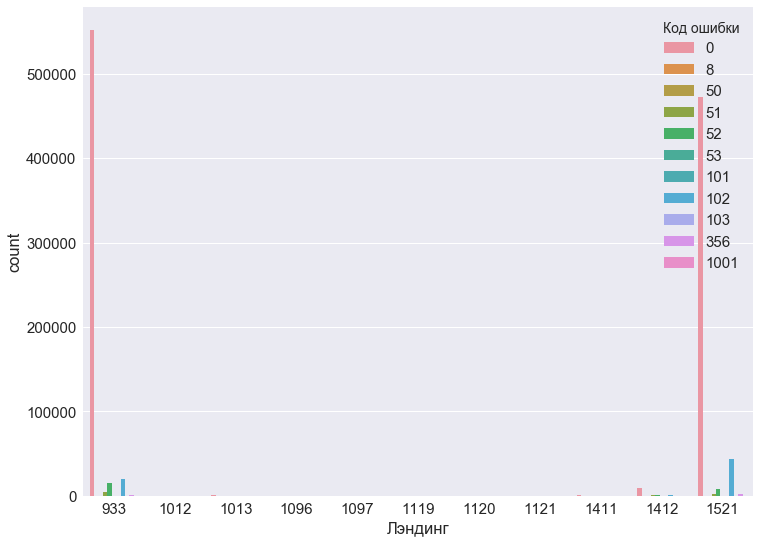

In [310]:
sns.countplot(x="Лэндинг", hue='Код ошибки', data=df_1);

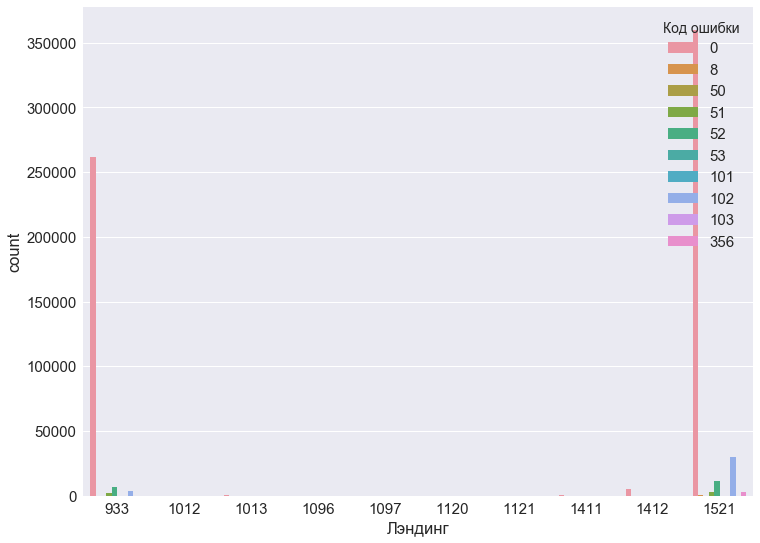

In [311]:
sns.countplot(x="Лэндинг", hue='Код ошибки', data=df_2);

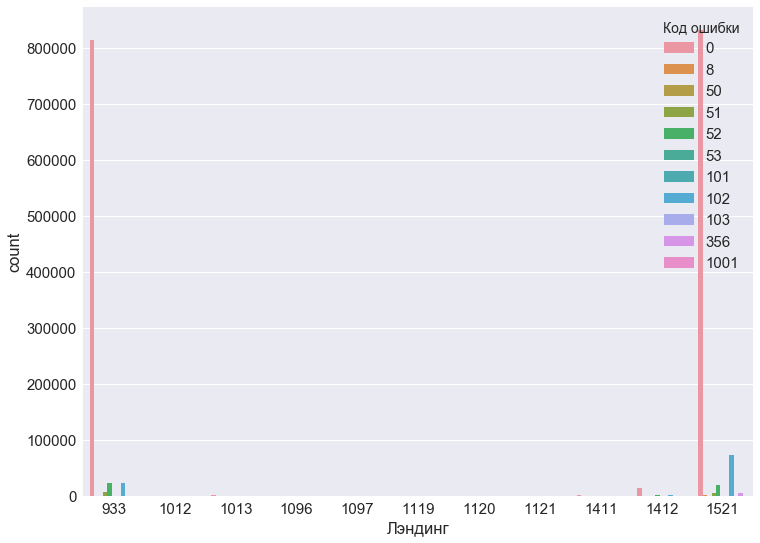

In [312]:
sns.countplot(x="Лэндинг", hue='Код ошибки', data=df_3);

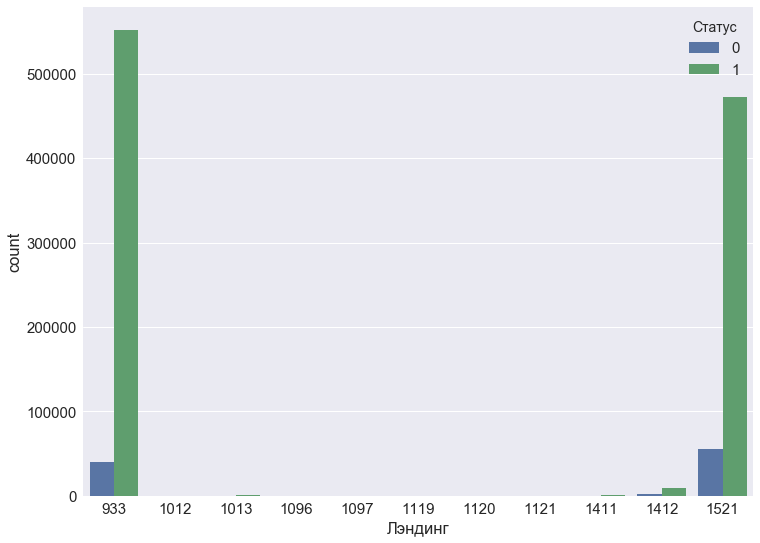

In [319]:
sns.countplot(x="Лэндинг", hue='Статус', data=df_1);

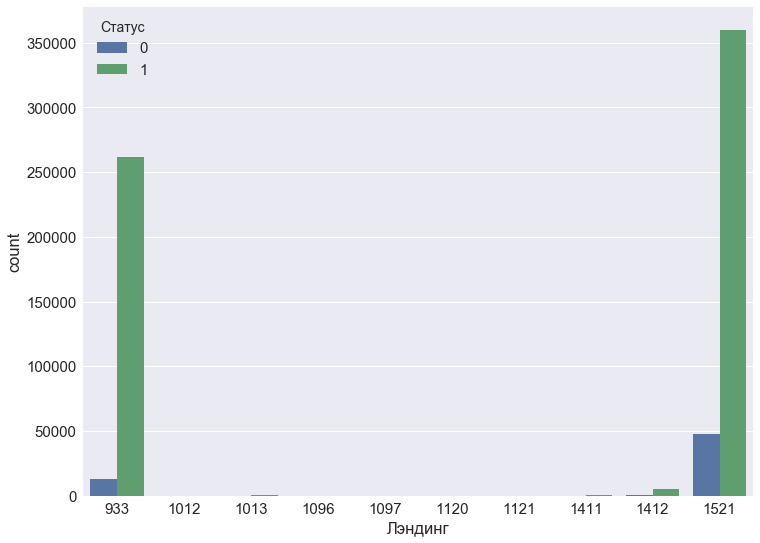

In [321]:
sns.countplot(x="Лэндинг", hue='Статус', data=df_2);

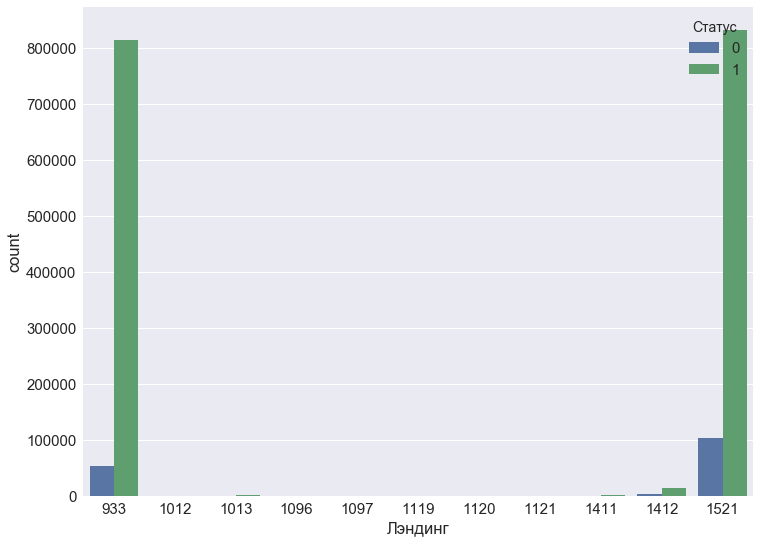

In [322]:
sns.countplot(x="Лэндинг", hue='Статус', data=df_3);

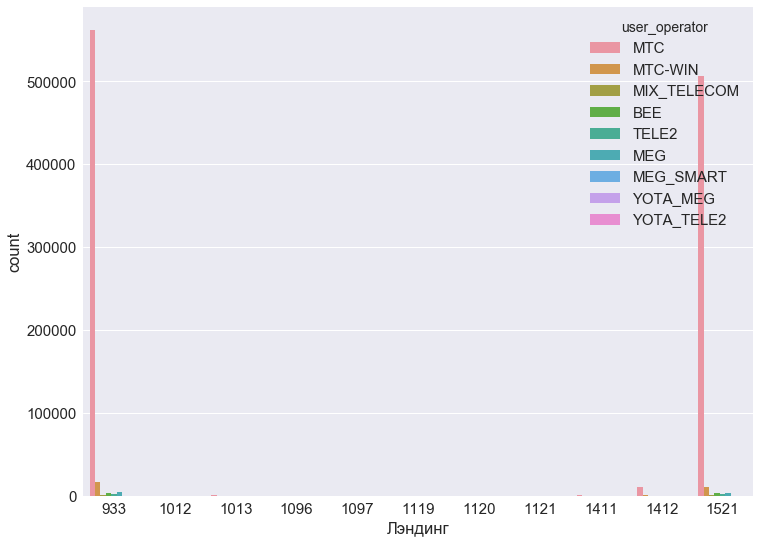

In [323]:
sns.countplot(x="Лэндинг", hue='user_operator', data=df_1);

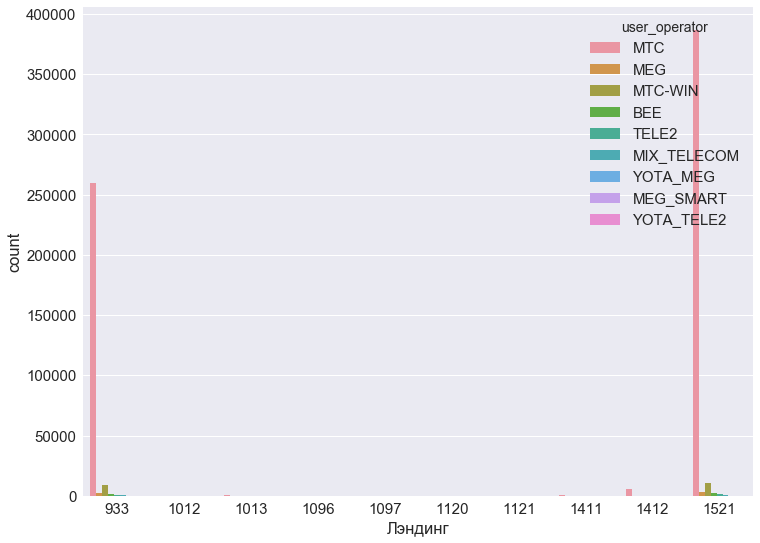

In [324]:
sns.countplot(x="Лэндинг", hue='user_operator', data=df_2);

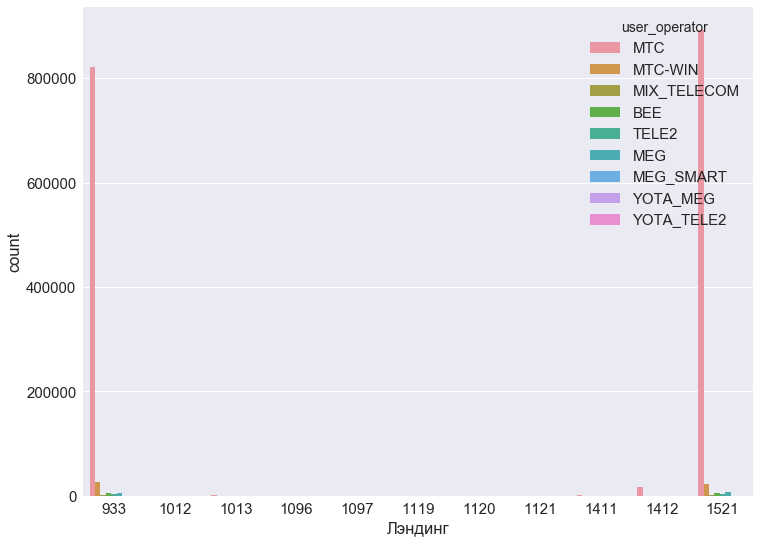

In [325]:
sns.countplot(x="Лэндинг", hue='user_operator', data=df_3);

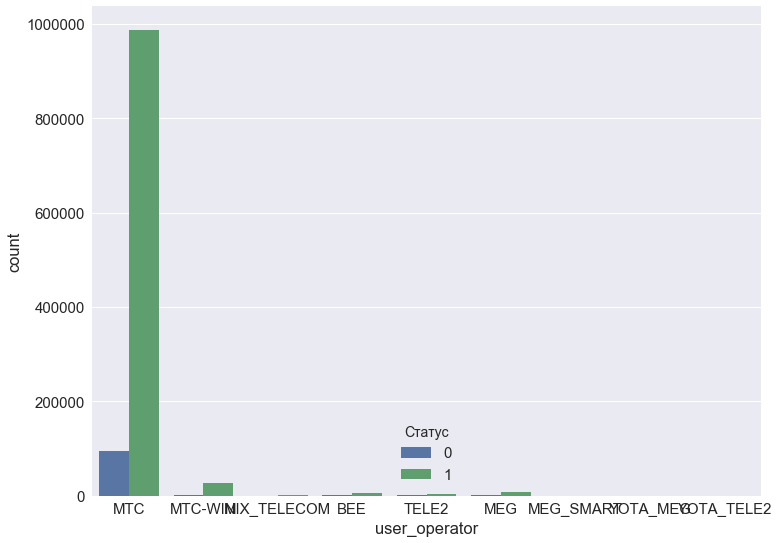

In [327]:
sns.countplot(x="user_operator", hue='Статус', data=df_1);

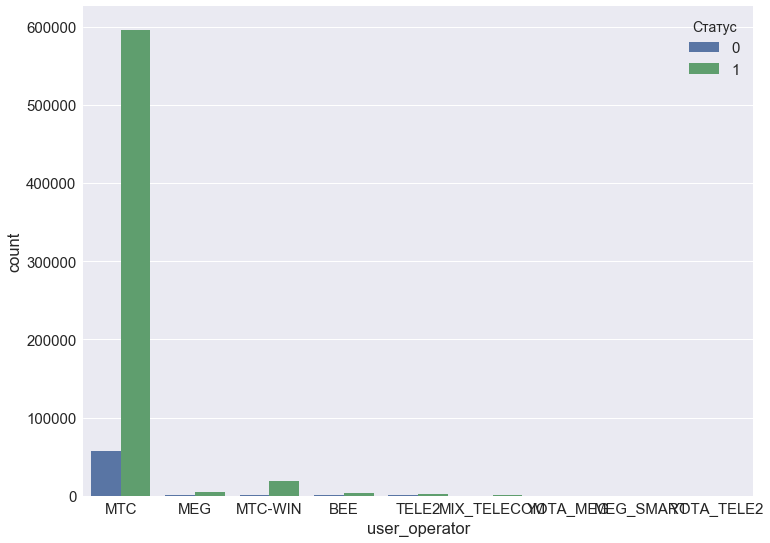

In [328]:
sns.countplot(x="user_operator", hue='Статус', data=df_2);

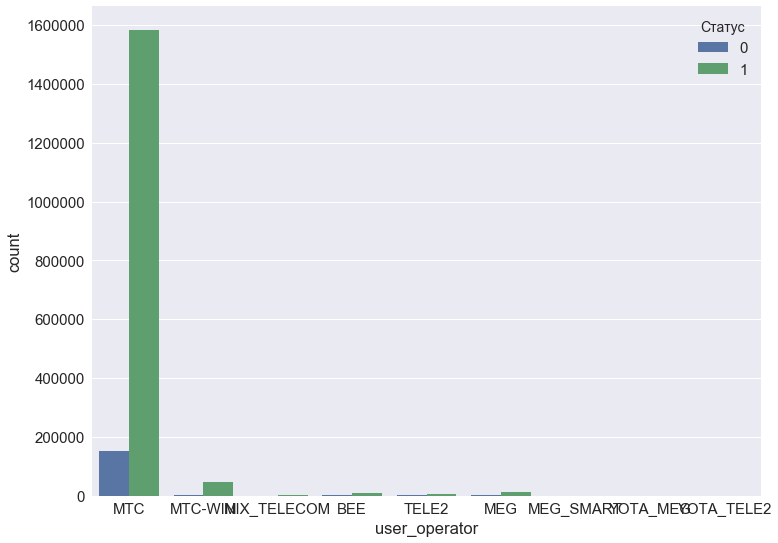

In [329]:
sns.countplot(x="user_operator", hue='Статус', data=df_3);

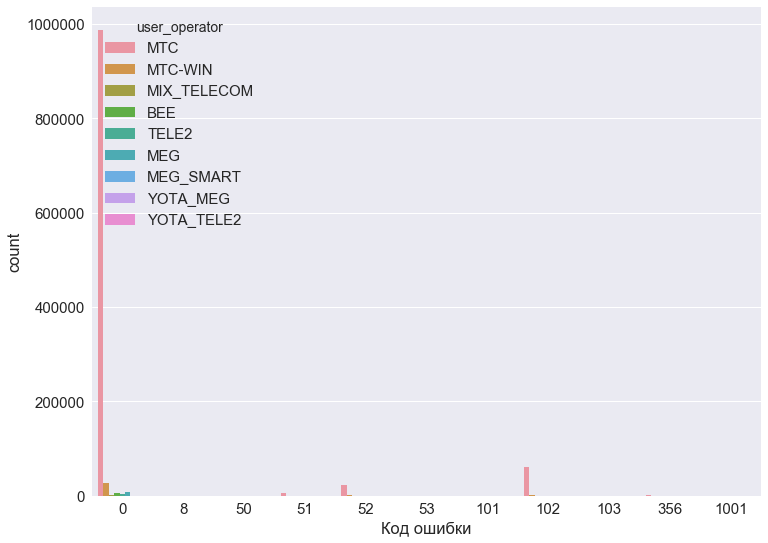

In [331]:
sns.countplot(x="Код ошибки", hue='user_operator', data=df_1);

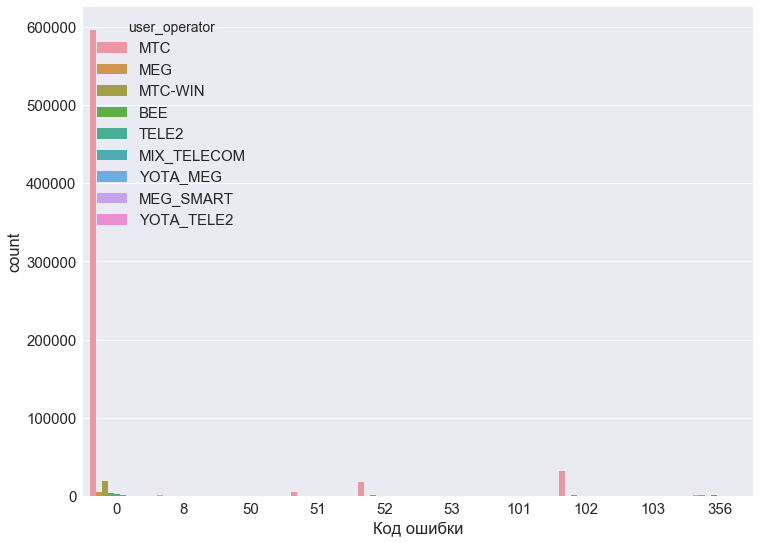

In [332]:
sns.countplot(x="Код ошибки", hue='user_operator', data=df_2);

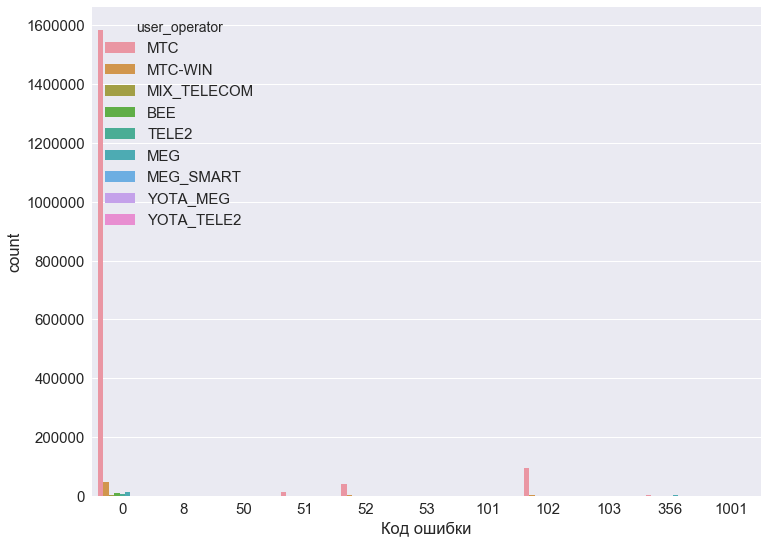

In [333]:
sns.countplot(x="Код ошибки", hue='user_operator', data=df_3);

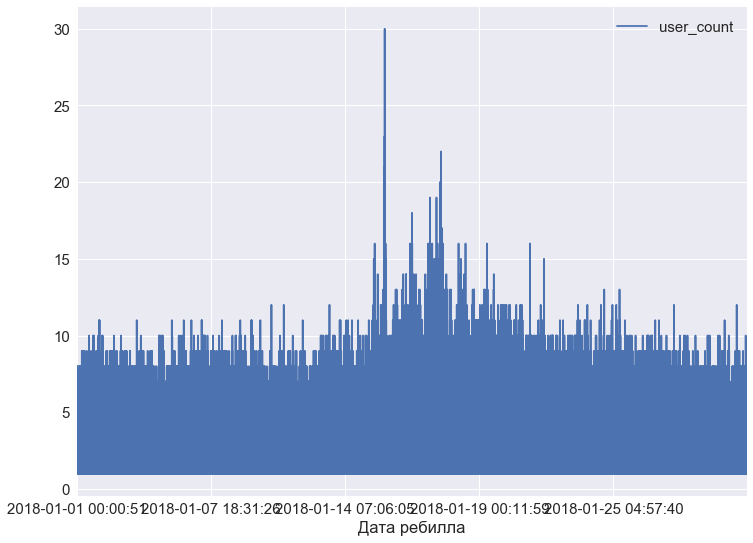

In [336]:
sales_df_1 = df_1[[x for x in df_1.columns if 'user' in x] + ['Дата ребилла']]
sales_df_1.groupby('Дата ребилла').sum().plot()

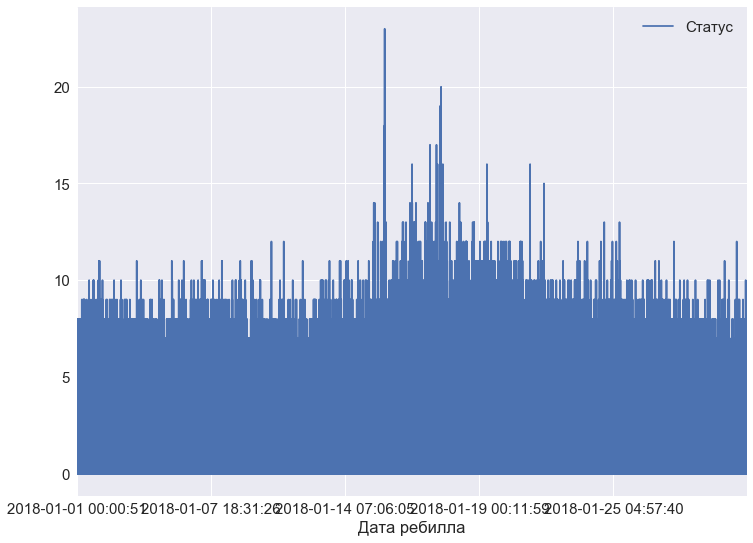

In [337]:
sales_df_1 = df_1[[x for x in df_1.columns if 'Статус' in x] + ['Дата ребилла']]
sales_df_1.groupby('Дата ребилла').sum().plot()

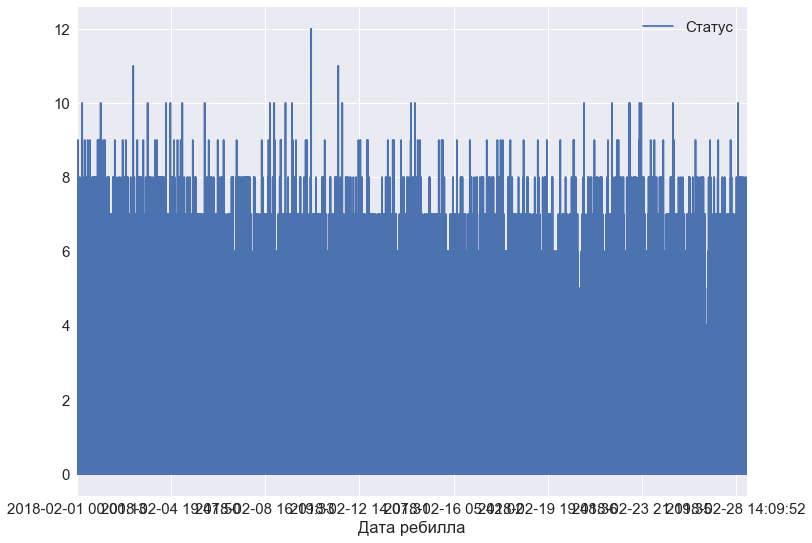

In [338]:
sales_df_2 = df_2[[x for x in df_1.columns if 'Статус' in x] + ['Дата ребилла']]
sales_df_2.groupby('Дата ребилла').sum().plot()

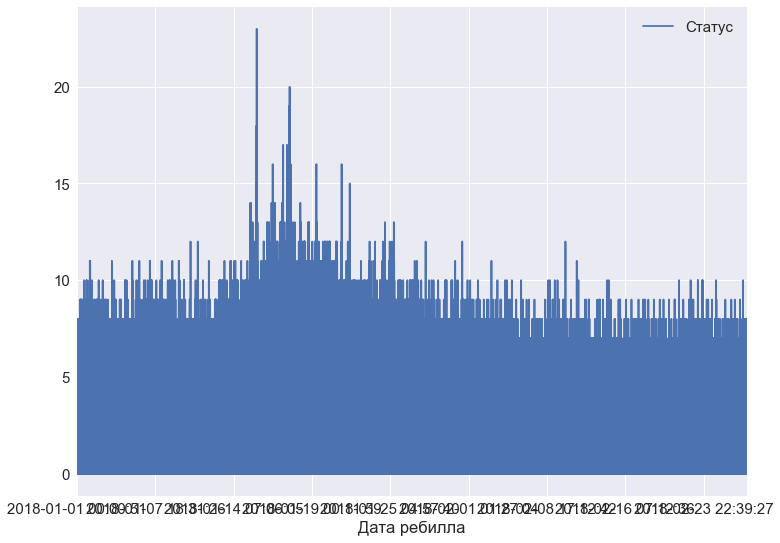

In [339]:
sales_df_3 = df_3[[x for x in df_1.columns if 'Статус' in x] + ['Дата ребилла']]
sales_df_3.groupby('Дата ребилла').sum().plot()

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [ ]:
упс. а вот и прерывание. оператива кончилась. ну что ока. пора идти пить пиво.